In [1]:
%matplotlib inline

import sys
import matplotlib
import matplotlib.pyplot as plt
# import seaborn as sns
import numpy as np
import pandas as pd
# import tabulate as tab
# import yaml
from scipy import constants

# import tabulate as tab
import root_pandas
# import uproot
# import pdg
# import glob

from track_propagation_in_CDC import *

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

Welcome to JupyROOT 6.24/00


# Create CDC model

### default values

In [2]:
# cdc = CDC({})

### user specific values

In [3]:
cdc_dummy = {
    'A' : np.array([ -83.1,    108.2+15.0  ]), 
    'B' : np.array([  158.6,   108.2+15.0  ]), 
    'C' : np.array([ -68.2,    37.14  ]),  ## corresponds to C2 in TDR
    'D' : np.array([  144.9,   43.80 ]),  
    'E' : np.array([ -47.4,    24.95 ]),
    'F' : np.array([   87.7,   24.95 ]), 
    'G' : np.array([  -999,    16.0  ]),
    'H' : np.array([  -999,    16.0 ]),
    'rho_min'  : np.array([25.0, 40.0, 75.0,  100.0]),
    'rho_max'  : np.array([35.0, 45.0, 90.0,  110.0]),
    'nLayers'  : np.array([ 2,  1,   1,   1]),
    'nCells'   : np.array([ 4,  3,   1,   2]),   
}



cdc = CDC(cdc_dummy)




# Input parameters of each track

In [4]:
d_p1 = {
            'q':  1,
            'px': 1.10,
            'py': 0.89,
            'pz': -0.29,
            'prodVtxX': 4.39,
            'prodVtxY': 3.21, 
            'prodVtxZ': -1.27, 
        }

d_p2 = {
            'q':  -1,
            'px': 0.17,
            'py': 0.03,
            'pz': -0.07,
            'prodVtxX': 4.39,
            'prodVtxY': 3.21, 
            'prodVtxZ': -1.27, 
        }

# Compute trajectories and evaluate the number of CDC hits

In [5]:
step=0.1   ## explain
step_in_phi=False ## explain

## use one cut (28 or 77 but not both)

traj_p1 = trajectory(d_p1, cdc, step, step_in_phi=step_in_phi)  
traj_p2 = trajectory(d_p2, cdc, step, step_in_phi=step_in_phi) 
print(f'step = {step}')
print(f'track1: {traj_p1.CDChits_clean28} CDC hits (cut 28), step = {traj_p1.CDChits_clean77} CDC hits (cut 77)')
print(f'track2: {traj_p2.CDChits_clean28} CDC hits (cut 28), step = {traj_p2.CDChits_clean77} CDC hits (cut 77)')

    
    

step = 0.1
track1: 5 CDC hits (cut 28), step = 5 CDC hits (cut 77)
track2: 3 CDC hits (cut 28), step = 3 CDC hits (cut 77)


# Make 2-d plots

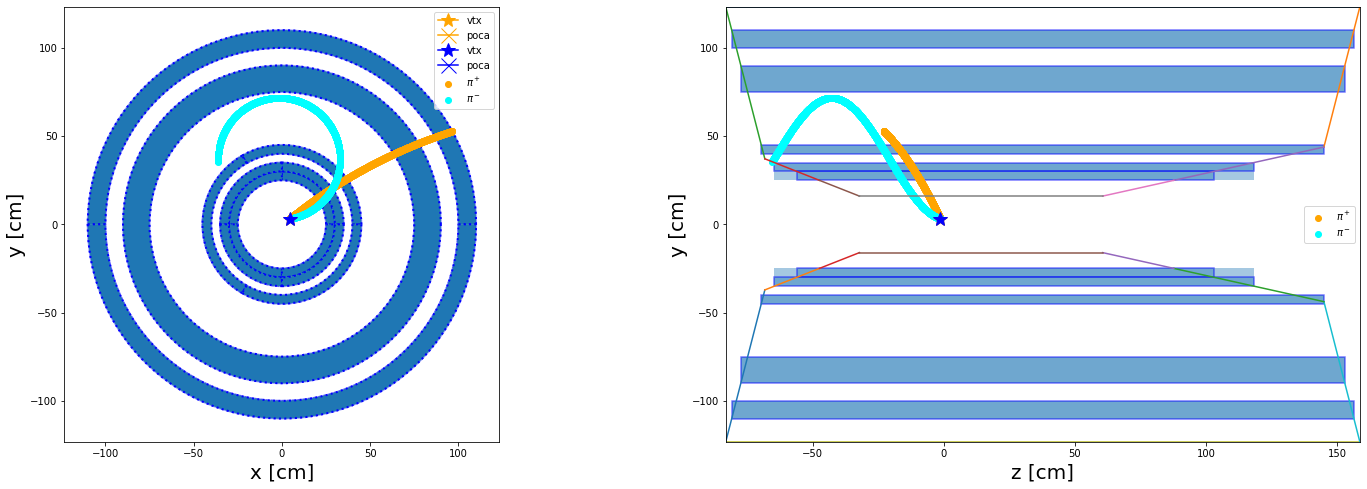

In [7]:
fig, axs = plt.subplots(1, 2, figsize = (25,8))


## (x-y) plane
ax = axs[0]
cdc.xy_contour(fig, ax)
cdc.xy_cells(fig, ax) # if your model contains a lot of cells you may want to comment this line (it is slow)
traj_p1.xy_trajectory(ax, r'$\pi^+$', 'orange')
traj_p1.xy_vertex(ax, 'vtx', 'orange')
traj_p1.xy_poca(ax, 'poca', 'orange')

traj_p2.xy_trajectory(ax, r'$\pi^-$', 'cyan')
traj_p2.xy_vertex(ax, 'vtx', 'b')
traj_p2.xy_poca(ax, 'poca', 'b')
ax.legend()

## (z-y) plane
ax = axs[1]
cdc.zy_contour(fig, ax)
cdc.zy_layers(fig, ax) 
traj_p1.zy_trajectory(ax, r'$\pi^+$', 'orange')
traj_p1.zy_vertex(ax, '', 'orange')
traj_p1.zy_poca(ax, '', 'orange')

traj_p2.zy_trajectory(ax, r'$\pi^-$', 'cyan')
traj_p2.zy_vertex(ax, '', 'b')
traj_p2.zy_poca(ax, '', 'b')
ax.legend()
plt.show();

# Make a 3-d plot [probably not needed]

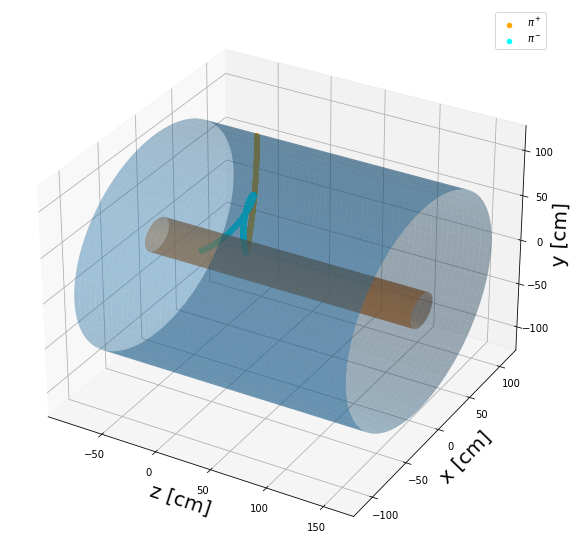

In [7]:
# %matplotlib notebook

def cylinder(r, h, a=0, nt=100, nv =50):
        """
        parametrize the cylinder of radius r, height h, base point a
        """
        theta = np.linspace(0, 2*np.pi, nt)
        v = np.linspace(a, a+h, nv )
        theta, v = np.meshgrid(theta, v)
        x = r*np.cos(theta)
        y = r*np.sin(theta)
        z = v
        return x, y, z

fig = plt.figure(figsize = (12,10))
ax = plt.axes(projection='3d')
# CHECK NUMBERS
x_outer, y_outer, z_outer = cylinder(r=cdc.rho_max[-1],h=2416.9*0.1, a=cdc.A[0])
x_inner, y_inner, z_inner = cylinder(r=cdc.rho_min[0], h=2416.9*0.1, a=cdc.A[0]) 
ax.plot_surface(z_outer, x_outer, y_outer, alpha = 0.4)   
ax.plot_surface(z_inner, x_inner, y_inner, alpha = 0.5)   

ax.scatter3D(traj_p1.points.z, traj_p1.points.y, traj_p1.points.x, c='orange', label=r'$\pi^+$')
ax.scatter3D(traj_p2.points.z, traj_p2.points.y, traj_p2.points.x, c='cyan',   label=r'$\pi^-$')


ax.set_xlabel('z [cm]', fontsize=20)
ax.set_ylabel('x [cm]', fontsize=20)
ax.set_zlabel('y [cm]', fontsize=20)
plt.legend()

# plt.tight_layout()
plt.show()